# not in virtual env

In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
topsup = pd.read_csv('top_supporters.csv')

In [3]:
topsup['fullname'] = topsup['contributor_firstname']+' '+topsup['contributor_lastname']

topsup1 = topsup[['fullname','amount']]
topsup2=pd.DataFrame(topsup1)


In [16]:
def combine_names(row):
    if row['fullname'].startswith('SEAN PARKER'):
        return 'SEAN PARKER'
    return row['fullname']
topsup2['cleanname'] = topsup2.apply(combine_names, axis=1)
topsup2
topsup3=topsup2.groupby('cleanname')['amount'].sum().reset_index()
topsup3=topsup3.sort_values('amount', ascending=True)
topsup3

,cleanname,amount
4,LAWRENCE HESS,30000.0
0,ANGELA HOWARD,65000.0
7,ROGER JENKINS,75000.0
6,PETER THIEL,300000.0
5,NICHOLAS PRITZKER,900000.0
2,HENRY VAN AMERINGEN,1000000.0
1,DANIEL LEWIS,1250000.0
3,JULIE SCHAUER,1364000.0
8,SEAN PARKER,8750000.0


## Plots

<IPython.core.display.Javascript object>


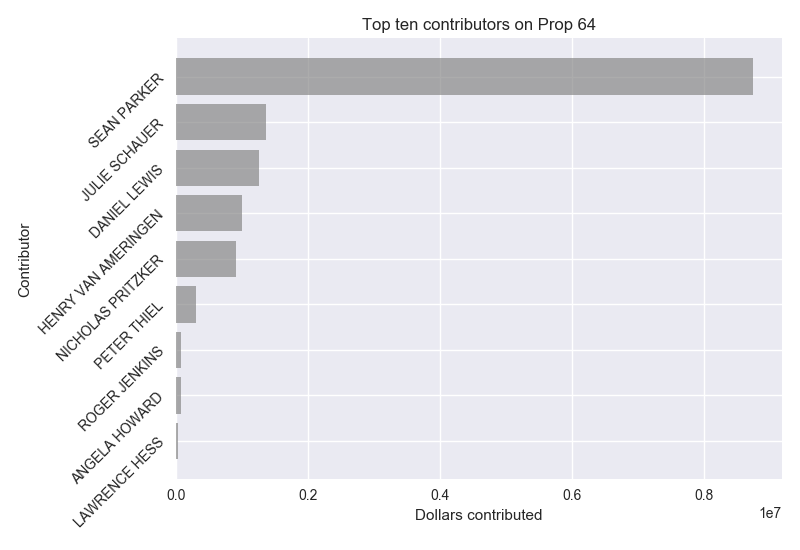

In [24]:
plt.figure()

ax1 = plt.subplot(111)
xvals = range(len(topsup3))
ax1.barh(xvals,topsup3['amount'],color = 'gray', alpha = 0.65)

ax1.set_yticks(np.arange(9))
lastnames = []
for i in topsup3['cleanname']:
    lastnames.append(i)
ax1.set_title('Top ten contributors on Prop 64')
ax1.set_xlabel('Dollars contributed')
ax1.set_ylabel('Contributor')
ax1.set_yticklabels(lastnames, rotation = 45)
plt.tight_layout()
#plt.savefig('toptenbar.pdf')
#xvals